<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

In [1]:
!pip install transformers --quiet

In [2]:
import tensorflow
from transformers import TFBertModel

In [3]:
import seaborn as sns

### Definiendo modelo

In [4]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [5]:
max_length = 50
max_length2 = 140
max_length3 = 200
output_shape = 3

In [6]:
 def crear_model(max_length, output_shape, bert_model):
  bert_model.bert.trainable = False

  input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
  attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

  outputs = bert_model(input_ids, attention_mask=attention_mask)

  pooled_output = outputs.pooler_output

  x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
  output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

  model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])
  return model

#Creo 3 modelos con distinto max_length

In [7]:
model = crear_model(max_length, output_shape, bert_model)


In [8]:
model2 = crear_model(max_length2, output_shape, bert_model)

In [9]:
model3 = crear_model(max_length3, output_shape, bert_model)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 50)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  multiple                     1094822   ['input_ids[0][0]',           
 )                                                        40         'attention_mask[0][0]']      
                                                                                              

In [11]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  multiple                     1094822   ['input_ids[0][0]',           
 )                                                        40         'attention_mask[0][0]']      
                                                                                            

In [12]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 200)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 200)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  multiple                     1094822   ['input_ids[0][0]',           
 )                                                        40         'attention_mask[0][0]']      
                                                                                            

In [13]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [12]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  49941      0  0:00:02  0:00:02 --:--:--  106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   381k      0  0:00:18  0:00:18 --:--:-- 1507k


In [13]:
import numpy as np


In [14]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [15]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


<Axes: xlabel='score', ylabel='count'>

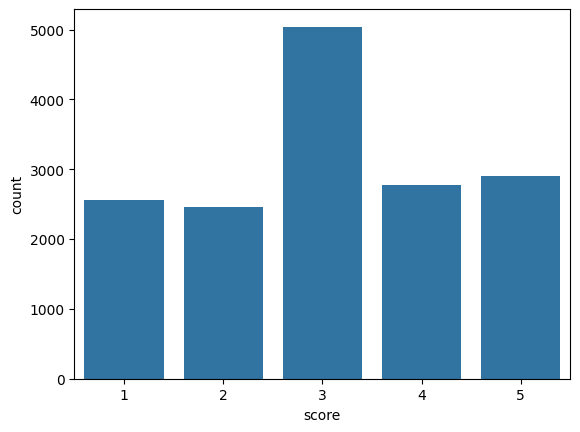

In [16]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

## Limpieza de datos

In [17]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

In [18]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


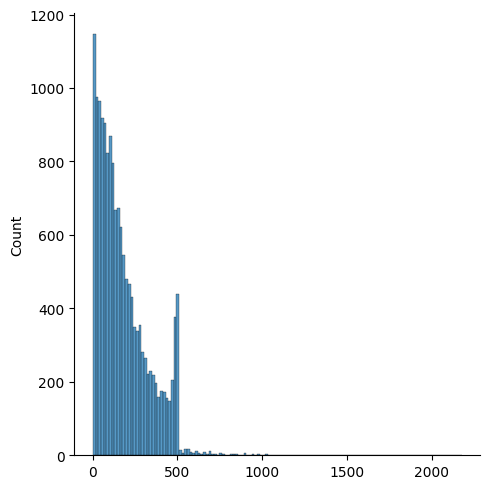

In [19]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## 1 - Data generator


In [22]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [23]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
#max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [25]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [26]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [27]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

In [28]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]
y_test = y[idx_test]

In [29]:
train_data2 = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length2)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data2 = train_data2.shuffle(100).batch(32)

validation_data2 = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length2)
validation_data2 = validation_data2.batch(32)
pred_sentences2 = [sentences[i] for i in idx_test]
tf_batch2 = bert_tokenizer(pred_sentences2, max_length=max_length2, padding=True, truncation=True, return_tensors='tf')
X_test2 = [tf_batch2['input_ids'],
          tf_batch2['attention_mask']]
y_test2 = y[idx_test]

In [30]:
train_data3 = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length3)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data3 = train_data3.shuffle(100).batch(32)

validation_data3 = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length3)
validation_data3 = validation_data3.batch(32)
pred_sentences3 = [sentences[i] for i in idx_test]
tf_batch3 = bert_tokenizer(pred_sentences, max_length=max_length3, padding=True, truncation=True, return_tensors='tf')
X_test3 = [tf_batch3['input_ids'],
          tf_batch3['attention_mask']]
y_test3 = y[idx_test]

## 2 - BERT multiclass classification

In [34]:
import matplotlib.pyplot as plt


In [32]:
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 66s 158ms/step - loss: 1.1173 - accuracy: 0.3936 - f1_score: 0.3884 - val_loss: 1.0476 - val_accuracy: 0.4036 - val_f1_score: 0.2947
Epoch 2/5
315/315 [==============================] - 46s 146ms/step - loss: 1.0398 - accuracy: 0.4597 - f1_score: 0.4516 - val_loss: 0.9776 - val_accuracy: 0.5099 - val_f1_score: 0.4724
Epoch 3/5
315/315 [==============================] - 47s 149ms/step - loss: 1.0145 - accuracy: 0.4810 - f1_score: 0.4713 - val_loss: 0.9594 - val_accuracy: 0.5377 - val_f1_score: 0.4481
Epoch 4/5
315/315 [==============================] - 47s 149ms/step - loss: 0.9855 - accuracy: 0.5050 - f1_score: 0.4944 - val_loss: 0.9386 - val_accuracy: 0.5361 - val_f1_score: 0.4963
Epoch 5/5
315/315 [==============================] - 47s 150ms/step - loss: 0.9786 - accuracy: 0.5124 - f1_score: 0.5031 - val_loss: 0.9120 - val_accuracy: 0.5667 - val_f1_score: 0.5527


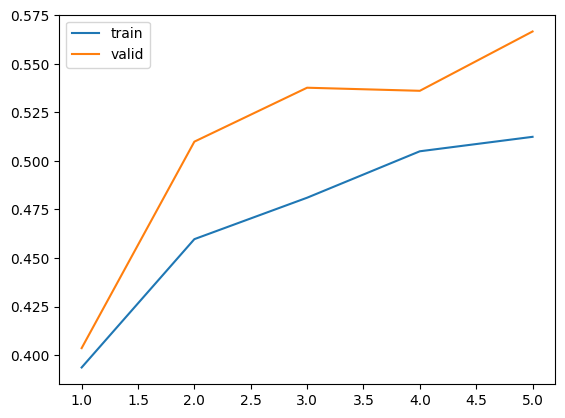

In [35]:
plot_train_metrics(history)

In [36]:
y_hat_prob = model.predict(X_test)
print(y_hat_prob[:3])
y_hat = np.argmax(y_hat_prob, axis=1)
scores = model.evaluate(X_test, y_test)
print(scores[1])

99/99 [==============================] - 15s 109ms/step
[[0.48795795 0.33780745 0.17423455]
 [0.32772994 0.3811245  0.29114556]
 [0.19495031 0.3661625  0.43888718]]
99/99 [==============================] - 14s 113ms/step - loss: 0.9073 - accuracy: 0.5667 - f1_score: 0.5491
0.5666666626930237


In [37]:
history2 = model2.fit(train_data2, epochs=5, validation_data=validation_data2)

Epoch 1/5
315/315 [==============================] - 145s 422ms/step - loss: 1.1144 - accuracy: 0.3949 - f1_score: 0.3890 - val_loss: 1.0134 - val_accuracy: 0.4845 - val_f1_score: 0.4510
Epoch 2/5
315/315 [==============================] - 145s 460ms/step - loss: 1.0319 - accuracy: 0.4634 - f1_score: 0.4535 - val_loss: 0.9834 - val_accuracy: 0.5115 - val_f1_score: 0.4235
Epoch 3/5
315/315 [==============================] - 128s 407ms/step - loss: 0.9996 - accuracy: 0.4932 - f1_score: 0.4824 - val_loss: 0.9438 - val_accuracy: 0.5389 - val_f1_score: 0.4544
Epoch 4/5
315/315 [==============================] - 144s 459ms/step - loss: 0.9773 - accuracy: 0.5189 - f1_score: 0.5089 - val_loss: 0.9214 - val_accuracy: 0.5508 - val_f1_score: 0.5271
Epoch 5/5
315/315 [==============================] - 128s 406ms/step - loss: 0.9655 - accuracy: 0.5204 - f1_score: 0.5096 - val_loss: 0.8996 - val_accuracy: 0.5738 - val_f1_score: 0.5570


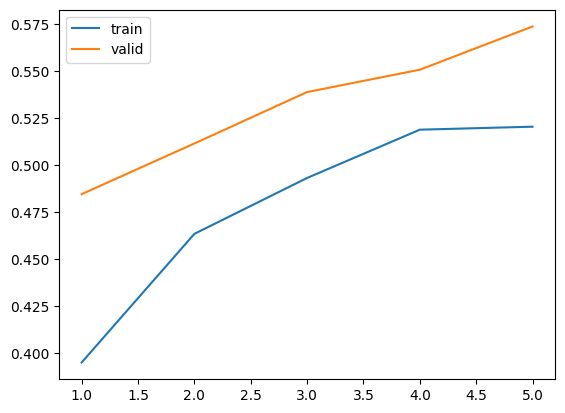

In [38]:
plot_train_metrics(history2)

In [41]:
y_hat_prob2 = model2.predict(X_test2)
print(y_hat_prob2[:3])
y_hat = np.argmax(y_hat_prob2, axis=1)
scores = model2.evaluate(X_test2, y_test2)
print(scores[1])

99/99 [==============================] - 35s 303ms/step
[[0.4804265  0.35092556 0.1686479 ]
 [0.38101938 0.30809683 0.31088382]
 [0.20769523 0.35807696 0.43422785]]
99/99 [==============================] - 34s 311ms/step - loss: 0.9000 - accuracy: 0.5749 - f1_score: 0.5546
0.574920654296875


In [42]:
history3 = model3.fit(train_data3, epochs=5, validation_data=validation_data3)

Epoch 1/5
315/315 [==============================] - 202s 600ms/step - loss: 1.1055 - accuracy: 0.4050 - f1_score: 0.3994 - val_loss: 1.0065 - val_accuracy: 0.5119 - val_f1_score: 0.4354
Epoch 2/5
315/315 [==============================] - 192s 609ms/step - loss: 1.0330 - accuracy: 0.4631 - f1_score: 0.4536 - val_loss: 0.9634 - val_accuracy: 0.5425 - val_f1_score: 0.4535
Epoch 3/5
315/315 [==============================] - 185s 589ms/step - loss: 0.9927 - accuracy: 0.5062 - f1_score: 0.4947 - val_loss: 0.9390 - val_accuracy: 0.5520 - val_f1_score: 0.4695
Epoch 4/5
315/315 [==============================] - 185s 588ms/step - loss: 0.9736 - accuracy: 0.5090 - f1_score: 0.4991 - val_loss: 0.9238 - val_accuracy: 0.5524 - val_f1_score: 0.4661
Epoch 5/5
315/315 [==============================] - 185s 589ms/step - loss: 0.9557 - accuracy: 0.5282 - f1_score: 0.5180 - val_loss: 0.9225 - val_accuracy: 0.5417 - val_f1_score: 0.5038


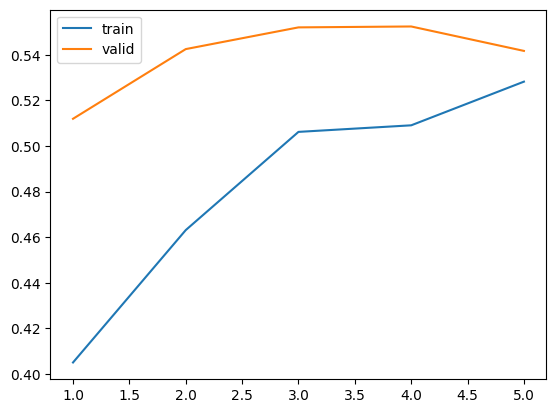

In [43]:
plot_train_metrics(history3)

In [44]:
y_hat_prob3 = model3.predict(X_test3)
print(y_hat_prob3[:3])
y_hat = np.argmax(y_hat_prob3, axis=1)
scores = model3.evaluate(X_test3, y_test3)
print(scores[1])

99/99 [==============================] - 47s 440ms/step
[[0.44646022 0.33227494 0.22126485]
 [0.3528079  0.274358   0.3728341 ]
 [0.18051863 0.32010353 0.49937785]]
99/99 [==============================] - 47s 440ms/step - loss: 0.9166 - accuracy: 0.5476 - f1_score: 0.5037
0.5476190447807312
